In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
cust_data = pd.read_csv('/content/drive/MyDrive/zeotap/Customers.csv')

In [5]:
cust_data.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [6]:
cust_data.shape

(200, 4)

In [7]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [8]:
cust_data.duplicated().sum()

0

In [9]:
cust_data.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [10]:
cust_data.nunique()

,0
CustomerID,200
CustomerName,200
Region,4
SignupDate,179


In [11]:
cust_data.Region.unique()

array(['South America', 'Asia', 'North America', 'Europe'], dtype=object)

In [12]:
cust_data.Region.value_counts()

,count
Region,
South America,59
Europe,50
North America,46
Asia,45


In [13]:
cust_data['SignupDate'] = pd.to_datetime(cust_data['SignupDate'])

In [14]:
print(cust_data.dtypes)

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object


In [15]:
# Extract year and month into temporary variables for grouping
yearly_signups = (
    cust_data.groupby([cust_data['SignupDate'].dt.year.rename('Year'),])
    .size()
    .reset_index(name='CustomerCount')
)

print(yearly_signups)



   Year  CustomerCount
0  2022             64
1  2023             57
2  2024             79


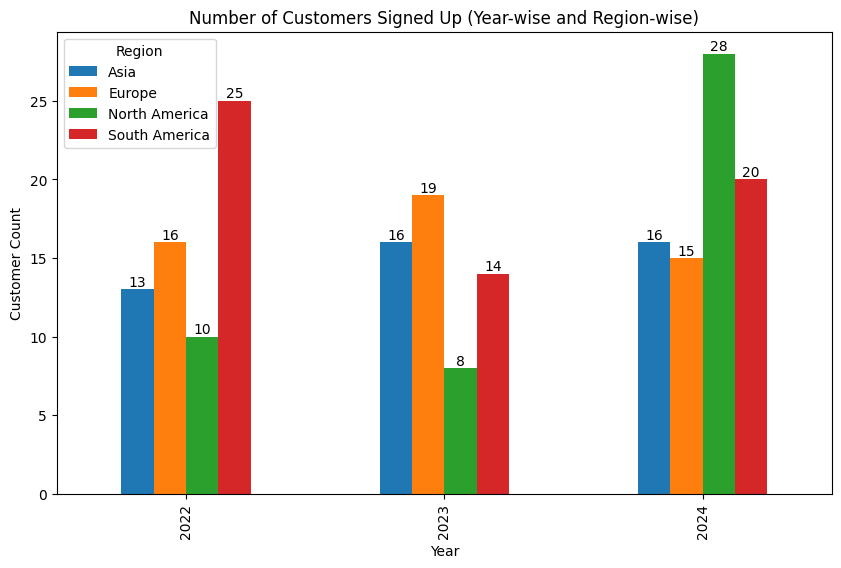

In [16]:
import matplotlib.pyplot as plt

# Create pivot table using groupby and unstack instead of pivot
pivot_data = cust_data.groupby([cust_data['SignupDate'].dt.year, 'Region'])['CustomerID'].count().unstack()

# Rename index for better readability
pivot_data.index.name = 'Year'

# Plot the grouped bar chart
ax = pivot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Customers Signed Up (Year-wise and Region-wise)')
plt.xlabel('Year')
plt.ylabel('Customer Count')
plt.legend(title='Region')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.show()

Exploration Summary


1. We have dataframe of Customers consisting of 200 rows and 4 columns.
2. Our dataframe looks bit tidy with no missing and duplicated values.
3. Signupdate column need to be casted into date time.
4. There are four regions from where customers belong from
  i.e 'South America', 'Asia', 'North America', 'Europe'
5. We get Number of Customers belonging from each region i.e valuecounts.  
6. Total number of years for which data is available is three  
    and number of customers signup year wise.



In [17]:
prod_data = pd.read_csv('/content/drive/MyDrive/zeotap/Products.csv')

In [18]:
prod_data.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [19]:
prod_data.shape

(100, 4)

In [20]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [21]:
prod_data.duplicated().sum()

0

In [22]:
prod_data.nunique()

,0
ProductID,100
ProductName,66
Category,4
Price,100


In [23]:
rep_prod_name = prod_data[prod_data.ProductName.duplicated(keep=False)]

In [24]:
rep_prod_name['ProductName'].value_counts()

,count
ProductName,
ActiveWear Smartwatch,4
SoundWave Headphones,4
TechPro T-Shirt,3
SoundWave Cookbook,3
ActiveWear Jacket,3
BookWorld Biography,3
HomeSense T-Shirt,3
TechPro Vase,2
HomeSense Rug,2


In [25]:
prod_data.isnull().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


In [26]:
prod_data.Category.value_counts()

,count
Category,
Books,26
Electronics,26
Clothing,25
Home Decor,23


In [27]:
prod_data.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


<ipython-input-28-565f99a8a3ac>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='price_range', data=price_range_per_category, palette='viridis')


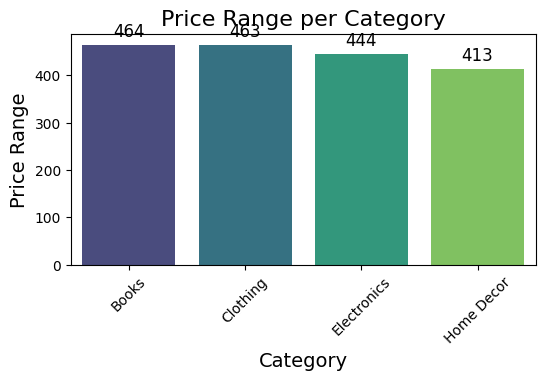

In [28]:
import seaborn as sns
price_range_per_category = prod_data.groupby('Category')['Price'].agg(lambda x: x.max() - x.min()).reset_index()
price_range_per_category.columns = ['category', 'price_range']


plt.figure(figsize=(6, 3))
sns.barplot(x='category', y='price_range', data=price_range_per_category, palette='viridis')


plt.title('Price Range per Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Price Range', fontsize=14)
plt.xticks(rotation=45)
for index, row in price_range_per_category.iterrows():
    plt.text(
        index,                              # X-coordinate
        row['price_range'] + 10,            # Y-coordinate (a bit above the bar)
        f"{row['price_range']:.0f}",       # Text to display
        ha='center', va='bottom', fontsize=12, color='black'
    )
plt.show()

Outliers in the Price Column:
Empty DataFrame
Columns: [ProductID, ProductName, Category, Price]
Index: []


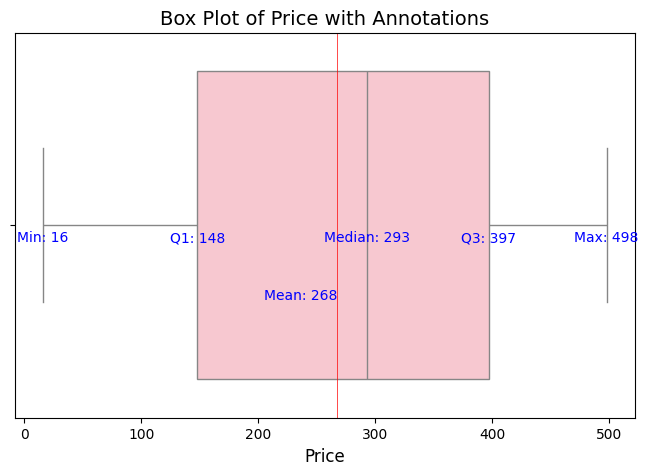

In [29]:
import numpy as np

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(prod_data['Price'], 25)
Q3 = np.percentile(prod_data['Price'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = prod_data[(prod_data['Price'] < lower_bound) | (prod_data['Price'] > upper_bound)]

print("Outliers in the Price Column:")
print(outliers)

#Representation through BOX PLOT
median = np.percentile(prod_data['Price'], 50)  # Median (Q2)
min_val = prod_data['Price'].min()  # Minimum value
max_val = prod_data['Price'].max()  # Maximum value
mean_val = prod_data['Price'].mean()  # Mean value

# Create Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=prod_data['Price'], color='pink')

# Annotate key statistics on the plot
plt.text(min_val, 0.05, f'Min: {min_val:.0f}', ha='center', va='bottom', fontsize=10, color='blue')
plt.text(Q1, 0.05, f'Q1: {Q1:.0f}', ha='center', va='bottom', fontsize=10, color='blue')
plt.text(median, 0.05, f'Median: {median:.0f}', ha='center', va='bottom', fontsize=10, color='blue')
plt.text(Q3, 0.05, f'Q3: {Q3:.0f}', ha='center', va='bottom', fontsize=10, color='blue')
plt.text(max_val, 0.05, f'Max: {max_val:.0f}', ha='center', va='bottom', fontsize=10, color='blue')

# Annotate mean value
plt.text(mean_val, 0.2, f'Mean: {mean_val:.0f}', ha='right', va='bottom', fontsize=10, color='blue')
# Add vertical line for the mean
plt.axvline(mean_val, color='red', linestyle='-', linewidth=0.5, label=f'Mean: {mean_val:.2f}')

# Labels and Title`
plt.title("Box Plot of Price with Annotations", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.show()


<ipython-input-30-f2d2277a1f09>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Price', data=prod_data, palette='pastel')


Text(0, 0.5, 'Price')

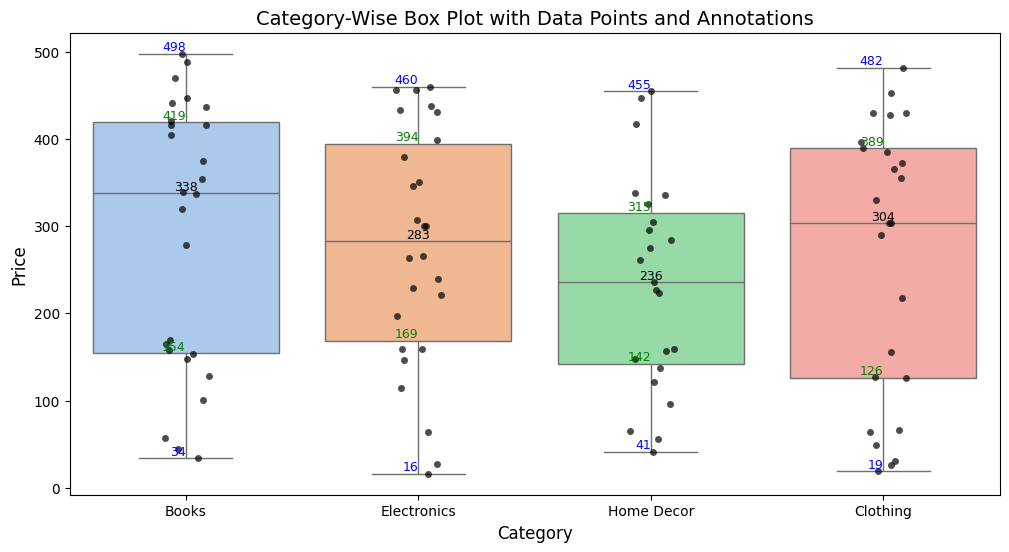

In [30]:
# Create a category-wise box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=prod_data, palette='pastel')

# Overlay scatter plot (data points)
sns.stripplot(x='Category', y='Price', data=prod_data, color='black', size=5, alpha=0.7, jitter=True)

# Add annotations for each category
categories = prod_data['Category'].unique()

for i, category in enumerate(categories):
    # Filter data for the current category
    category_prices = prod_data[prod_data['Category'] == category]['Price']

    # Calculate statistics
    Q1 = np.percentile(category_prices, 25)  # First Quartile (Q1)
    Q3 = np.percentile(category_prices, 75)  # Third Quartile (Q3)
    median = np.percentile(category_prices, 50)  # Median (Q2)
    min_val = category_prices.min()  # Minimum value
    max_val = category_prices.max()  # Maximum value

    # Annotate on the box plot
    plt.text(i, min_val, f'{min_val:.0f}', ha='right', va='bottom', fontsize=9, color='blue')
    plt.text(i, Q1, f'{Q1:.0f}', ha='right', va='bottom', fontsize=9, color='green')
    plt.text(i, median, f'{median:.0f}', ha='center', va='bottom', fontsize=9, color='black')
    plt.text(i, Q3, f'{Q3:.0f}', ha='right', va='bottom', fontsize=9, color='green')
    plt.text(i, max_val, f'{max_val:.0f}', ha='right', va='bottom', fontsize=9, color='blue')

# Add titles and labels
plt.title("Category-Wise Box Plot with Data Points and Annotations", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Price", fontsize=12)


Exploratory Analysis for Prod_data:


1.  We have dataframe of Customers consisting of 100 rows and 4 columns.
2.  Our dataframe looks bit tidy with no missing and duplicated values.
3. Same product name can have different product ID.
4. Four different categories of products are there i.e Books, Electronics, Home Decor and clothing.
5. No outliers in the distribution of Price column as well as in category-wise price distribution.



In [31]:
Trans_data = pd.read_csv('/content/drive/MyDrive/zeotap/Transactions.csv')

In [32]:
Trans_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [33]:
Trans_data.shape

(1000, 7)

In [34]:
 Trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [35]:
Trans_data['CustomerID'].nunique()

199

In [36]:
cust_data_customers = set(cust_data['CustomerID'].unique())
transaction_customers = set(Trans_data['CustomerID'].unique())

# Find customers in cust_data but not in transactions_data
missing_customers = cust_data_customers - transaction_customers

# Display missing customers
print(f"Number of missing customers: {len(missing_customers)}")
print("Missing Customer IDs:", missing_customers)

Number of missing customers: 1
Missing Customer IDs: {'C0180'}


In [37]:
# Get customer details for IDs in the list
missing_customer_details = cust_data[cust_data['CustomerID'].isin(missing_customers)][['CustomerID', 'CustomerName', 'Region']]

print(missing_customer_details)


    CustomerID   CustomerName Region
179      C0180  Amy Carpenter   Asia


In [38]:
Trans_data.nunique()

,0
TransactionID,1000
CustomerID,199
ProductID,100
TransactionDate,1000
Quantity,4
TotalValue,369
Price,100


In [39]:
# Calculate overall total sales
total_sales = Trans_data['TotalValue'].sum()

# Calculate average sales per transaction
average_sales_per_transaction = Trans_data['TotalValue'].mean()

max_sales_transaction =  Trans_data['TotalValue'].max()
min_sales_transaction =  Trans_data['TotalValue'].min()

print(f"Overall Total Sales: {total_sales:.2f}")
print(f"Average Sales per Transaction: {average_sales_per_transaction:.2f}")
print(f"Maximum Sales Transaction:{max_sales_transaction}")
print(f"Minimum Sales Transaction:{min_sales_transaction}")

Overall Total Sales: 689995.56
Average Sales per Transaction: 690.00
Maximum Sales Transaction:1991.04
Minimum Sales Transaction:16.08


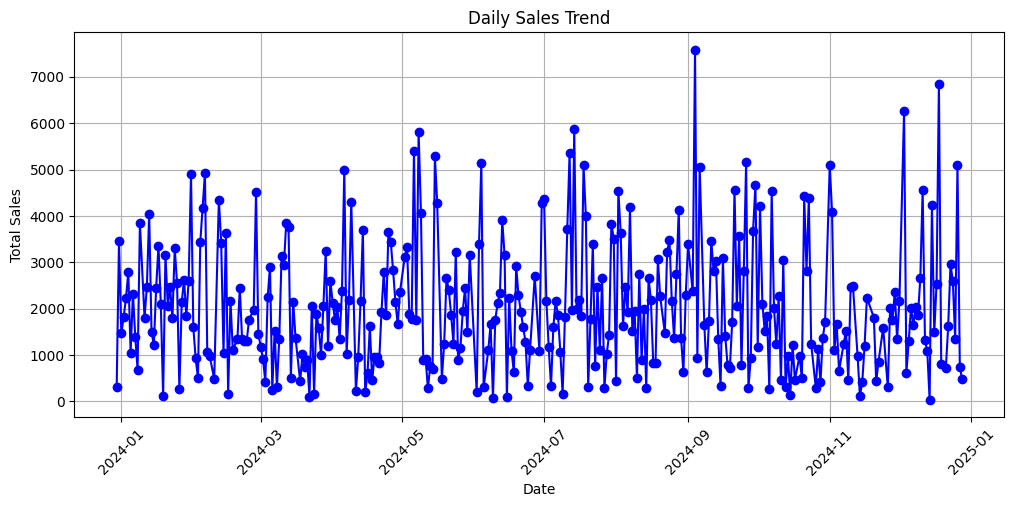

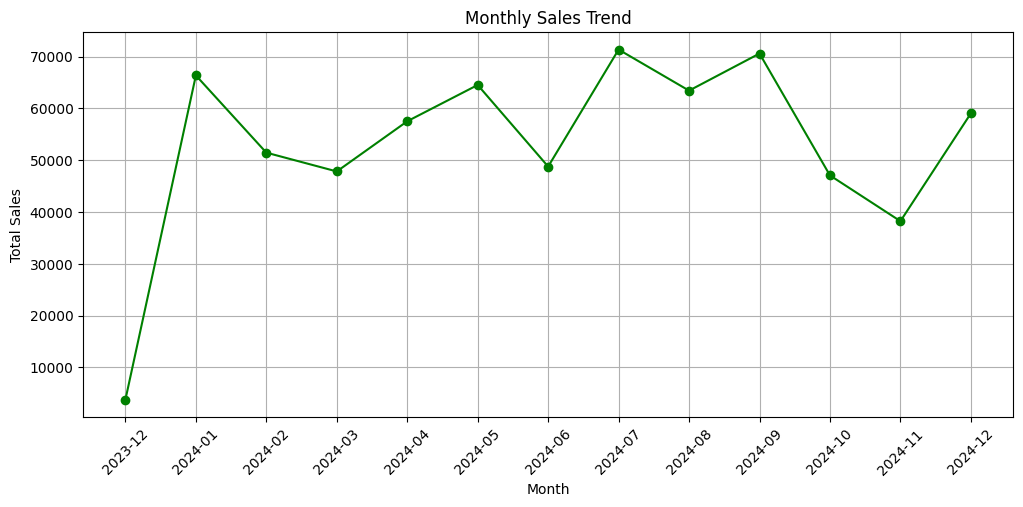

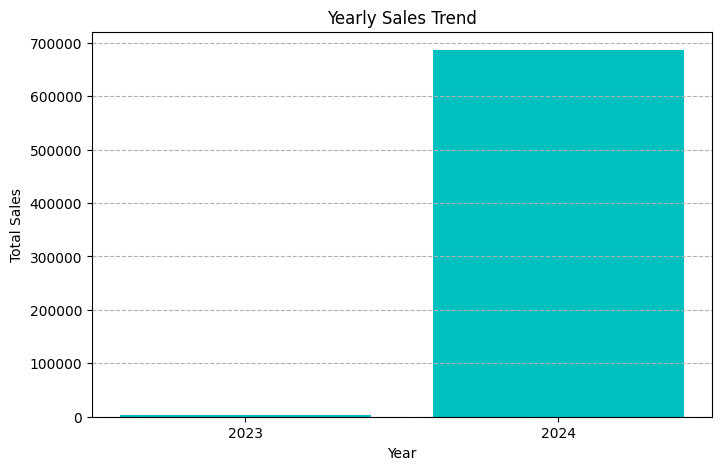

In [40]:
# Ensure TransactionDate is in datetime format
Trans_data['TransactionDate'] = pd.to_datetime(Trans_data['TransactionDate'])

# Extracting Date, Month, and Year
Trans_data['Year'] = Trans_data['TransactionDate'].dt.year
Trans_data['Month'] = Trans_data['TransactionDate'].dt.to_period('M')  # Monthly period
Trans_data['Day'] = Trans_data['TransactionDate'].dt.date  # Only Date

# Group sales by Day, Month, and Year
daily_sales = Trans_data.groupby('Day')['TotalValue'].sum()
monthly_sales = Trans_data.groupby('Month')['TotalValue'].sum()
yearly_sales = Trans_data.groupby('Year')['TotalValue'].sum()

# Plot Daily Sales Trend
plt.figure(figsize=(12, 5))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='b')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot Monthly Sales Trend
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='-', color='g')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot Yearly Sales Trend
plt.figure(figsize=(8, 5))
plt.bar(yearly_sales.index, yearly_sales.values, color='c')
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(yearly_sales.index)
plt.grid(axis='y', linestyle='--')
plt.show()


<ipython-input-41-dd6a62fdc284>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_transactions.index, y=hourly_transactions.values, palette="Blues_d")


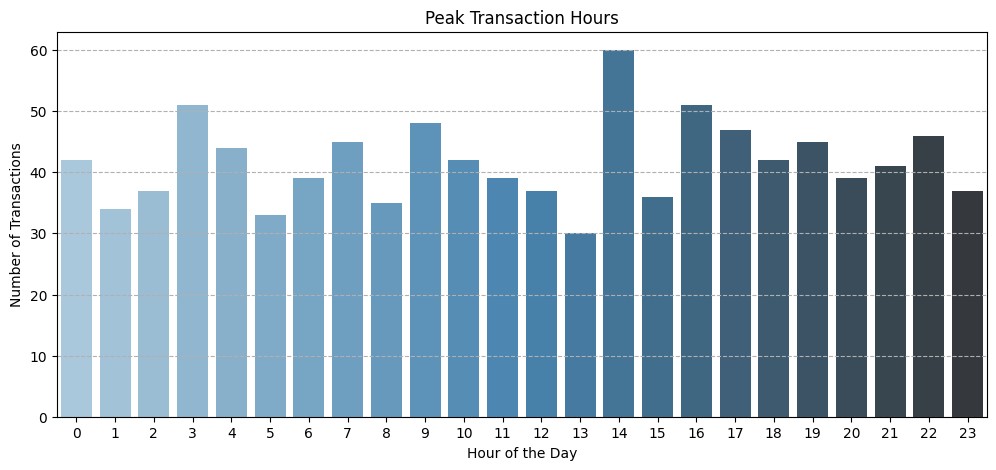

<ipython-input-41-dd6a62fdc284>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_transactions.index, y=weekday_transactions.values, palette="Greens_d")


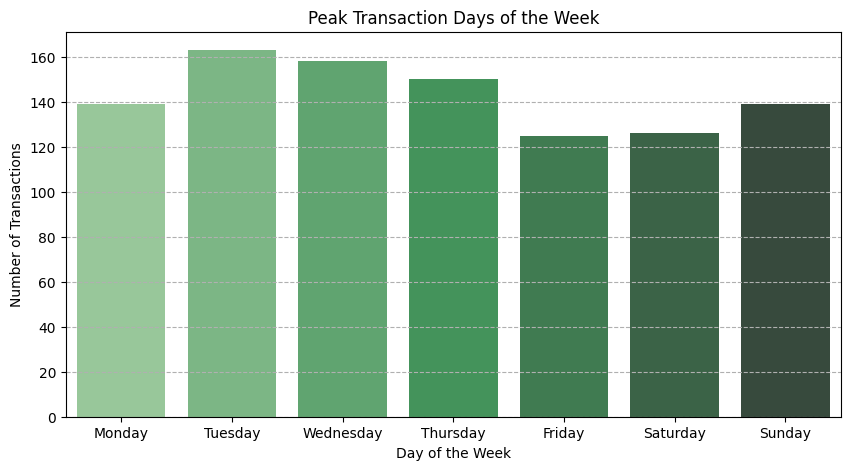

<ipython-input-41-dd6a62fdc284>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_transactions.index, y=monthly_transactions.values, palette="Oranges_d")


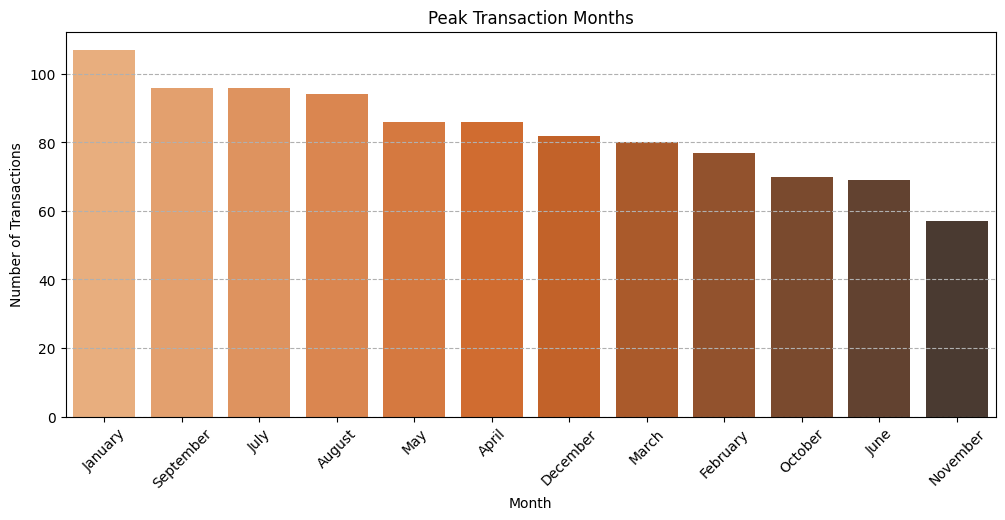

In [41]:
#Peak Transaction
# Extract relevant time components
Trans_data['Hour'] = Trans_data['TransactionDate'].dt.hour
Trans_data['Weekday'] = Trans_data['TransactionDate'].dt.day_name()
Trans_data['Month'] = Trans_data['TransactionDate'].dt.month_name()

# Count transactions per hour
hourly_transactions = Trans_data['Hour'].value_counts().sort_index()

# Count transactions per weekday
weekday_transactions = Trans_data['Weekday'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Count transactions per month
monthly_transactions = Trans_data['Month'].value_counts()

# 🔹 Plot Transactions Per Hour
plt.figure(figsize=(12, 5))
sns.barplot(x=hourly_transactions.index, y=hourly_transactions.values, palette="Blues_d")
plt.title("Peak Transaction Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--')
plt.show()

# 🔹 Plot Transactions Per Weekday
plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_transactions.index, y=weekday_transactions.values, palette="Greens_d")
plt.title("Peak Transaction Days of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")
plt.grid(axis='y', linestyle='--')
plt.show()

# 🔹 Plot Transactions Per Month
plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_transactions.index, y=monthly_transactions.values, palette="Oranges_d")
plt.title("Peak Transaction Months")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


Top Customers by Transaction value

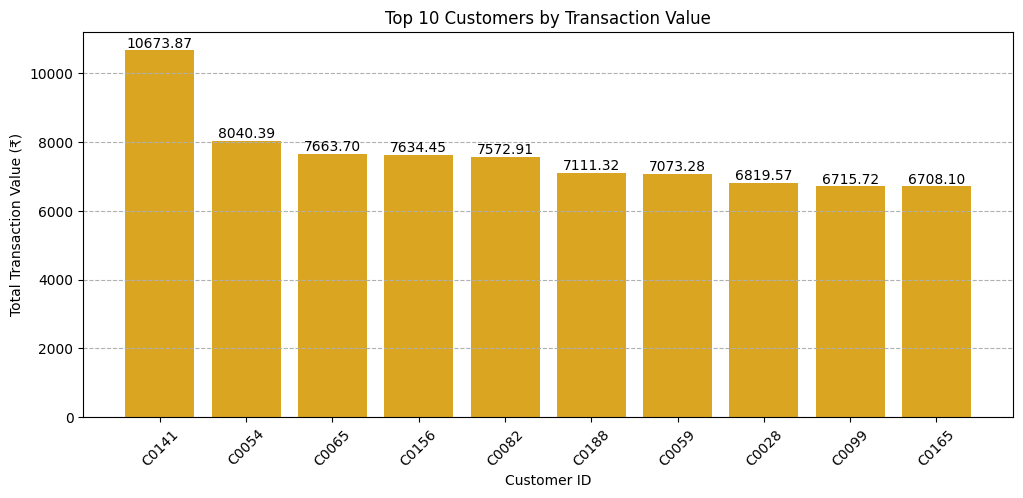

    CustomerID  TotalValue
140      C0141    10673.87
53       C0054     8040.39
64       C0065     7663.70
155      C0156     7634.45
81       C0082     7572.91
186      C0188     7111.32
58       C0059     7073.28
27       C0028     6819.57
98       C0099     6715.72
164      C0165     6708.10


In [42]:
# Group by CustomerID and sum the TotalValue
top_customers = Trans_data.groupby('CustomerID')['TotalValue'].sum().reset_index()

# Sort by TotalValue in descending order
top_customers = top_customers.sort_values(by='TotalValue', ascending=False).head(10)  # Top 10 customers

# Plot the top customers
plt.figure(figsize=(12, 5))
bars = plt.bar(top_customers['CustomerID'].astype(str), top_customers['TotalValue'], color='goldenrod')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2,
             f'{bar.get_height():.2f}', va='bottom', ha='center', fontsize=10)
plt.title("Top 10 Customers by Transaction Value")
plt.xlabel("Customer ID")
plt.ylabel("Total Transaction Value (₹)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

# Display the top customers as a table
print(top_customers)


Repeat customers vs one time customers

In [43]:
# Step 1: Group by CustomerID and count the number of transactions per customer
customer_transaction_count = Trans_data.groupby('CustomerID')['TransactionID'].nunique().reset_index()
customer_transaction_count.rename(columns={'TransactionID': 'TransactionCount'}, inplace=True)

# Step 2: Categorize customers into repeat and one-time
customer_transaction_count['CustomerType'] = customer_transaction_count['TransactionCount'].apply(
    lambda x: 'Repeat' if x > 1 else 'One-Time'
)

# Step 3: Count the number of repeat and one-time customers
customer_type_counts = customer_transaction_count['CustomerType'].value_counts()

# Step 4: Display the results
print("Customer Type Counts:")
print(customer_type_counts)

Customer Type Counts:
CustomerType
Repeat      187
One-Time     12
Name: count, dtype: int64


In [44]:
# Group by ProductID and sum the Quantity
most_sold_products = Trans_data.groupby('ProductID')['Quantity'].sum().reset_index()

# Sort the products by Quantity in descending order
most_sold_products = most_sold_products.sort_values(by='Quantity', ascending=False)

# Display the most sold products
print(most_sold_products)

   ProductID  Quantity
58      P059        46
53      P054        46
28      P029        45
78      P079        43
60      P061        43
..       ...       ...
43      P044        13
59      P060        13
23      P024        12
98      P099        11
30      P031         9

[100 rows x 2 columns]


Most sold products

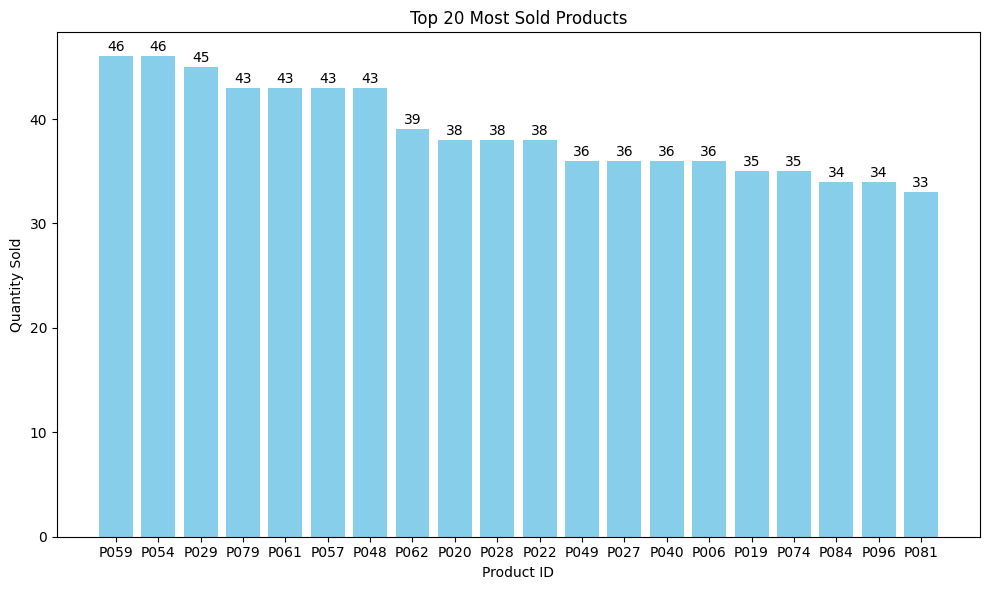

In [45]:
# Group by ProductID and sum the Quantity
most_sold_products = Trans_data.groupby('ProductID')['Quantity'].sum().reset_index()

# Sort the products by Quantity in descending order
most_sold_products = most_sold_products.sort_values(by='Quantity', ascending=False)

# Select the top 10 most sold products
top_n = 20  # kept for top 20 products getting sold
top_sold_products = most_sold_products.head(top_n)


plt.figure(figsize=(10, 6))
bars = plt.bar(top_sold_products['ProductID'].astype(str), top_sold_products['Quantity'], color='skyblue')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2,
             f'{bar.get_height()}', va='bottom', ha='center', fontsize=10)

plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.title(f'Top {top_n} Most Sold Products')
plt.tight_layout()
plt.show()

Least sold products

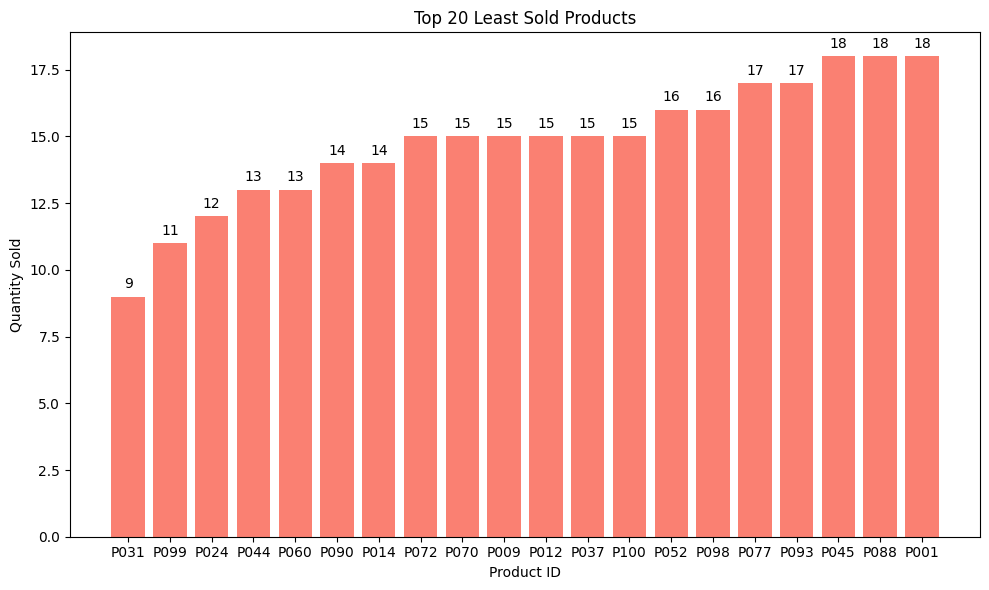

In [46]:
least_sold_products = Trans_data.groupby('ProductID')['Quantity'].sum().reset_index()
least_sold_products = least_sold_products.sort_values(by='Quantity', ascending=True)

# Select the bottom 20 least sold products
bottom_n = 20  # You can change this value
least_sold_products = least_sold_products.head(bottom_n)

# Plot the data using horizontal bars for better readability
plt.figure(figsize=(10, 6))
bars=plt.bar(least_sold_products['ProductID'].astype(str), least_sold_products['Quantity'], color='salmon')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2,
             f'{bar.get_height()}', va='bottom', ha='center', fontsize=10)
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.title(f'Top {bottom_n} Least Sold Products')
plt.tight_layout()
plt.show()

In [47]:
# Calculate total revenue
total_revenue = Trans_data['TotalValue'].sum()

# Group by ProductID and calculate revenue per product
product_revenue = Trans_data.groupby('ProductID')['TotalValue'].sum().reset_index()

# Calculate contribution percentage of each product to total revenue
product_revenue['ContributionPercentage'] = (product_revenue['TotalValue'] / total_revenue) * 100

# Sort by contribution percentage (optional)
product_revenue = product_revenue.sort_values(by='ContributionPercentage', ascending=False)

# Display the result
print("Total Revenue:", total_revenue)
print(product_revenue)

Total Revenue: 689995.56
   ProductID  TotalValue  ContributionPercentage
28      P029    19513.80                2.828105
78      P079    17946.91                2.601018
47      P048    17905.20                2.594973
19      P020    15060.92                2.182756
61      P062    14592.24                2.114831
..       ...         ...                     ...
69      P070      730.35                0.105849
72      P073      647.76                0.093879
13      P014      367.64                0.053282
55      P056      337.68                0.048939
43      P044      244.66                0.035458

[100 rows x 3 columns]


<ipython-input-48-408796696e2a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProductID', y='ContributionPercentage', data=product_revenue, palette='viridis')


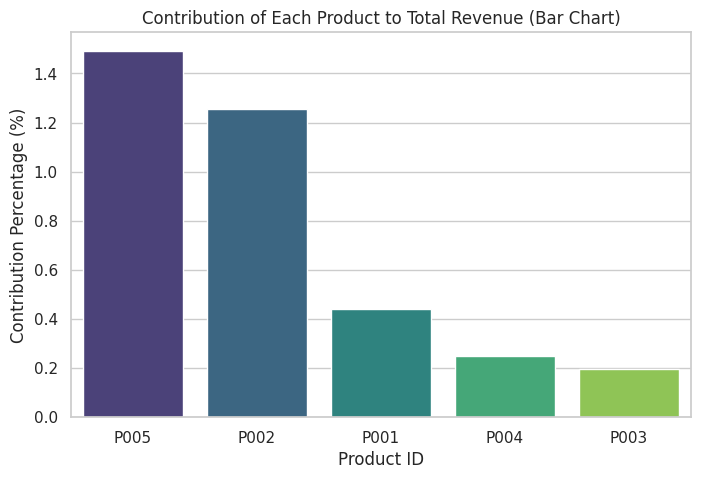

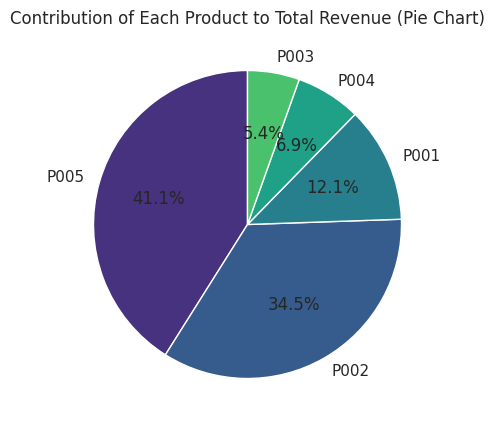

In [48]:
# Calculate total revenue
total_revenue = Trans_data['TotalValue'].sum()

# Group by ProductID and calculate revenue per product
product_revenue =Trans_data.groupby('ProductID')['TotalValue'].sum().head().reset_index()

# Calculate contribution percentage of each product to total revenue
product_revenue['ContributionPercentage'] = (product_revenue['TotalValue'] / total_revenue) * 100

# Sort by contribution percentage (optional)
product_revenue = product_revenue.sort_values(by='ContributionPercentage', ascending=False)

# Set style for seaborn
sns.set(style="whitegrid")

# Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x='ProductID', y='ContributionPercentage', data=product_revenue, palette='viridis')
plt.title('Contribution of Each Product to Total Revenue (Bar Chart)')
plt.xlabel('Product ID')
plt.ylabel('Contribution Percentage (%)')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 5))
plt.pie(product_revenue['ContributionPercentage'], labels=product_revenue['ProductID'], autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)
plt.title('Contribution of Each Product to Total Revenue (Pie Chart)')
plt.show()

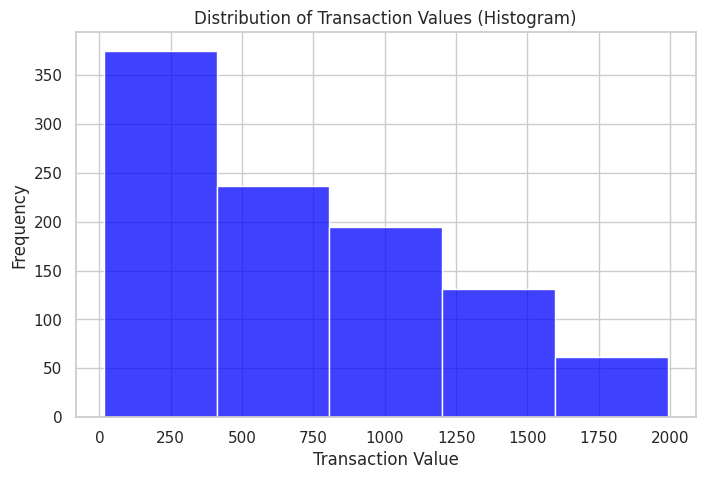

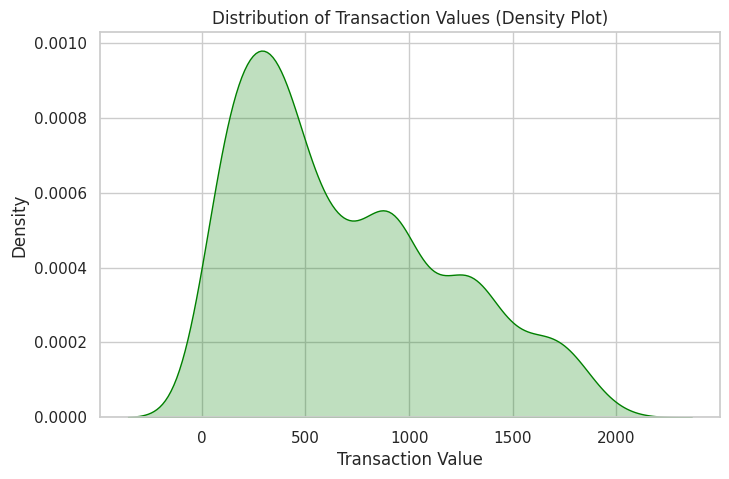

In [49]:
# Set style for seaborn
sns.set(style="whitegrid")

# Histogram of Transaction Values
plt.figure(figsize=(8, 5))
sns.histplot(Trans_data['TotalValue'], bins=5, kde=False, color='blue')
plt.title('Distribution of Transaction Values (Histogram)')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')
plt.show()

# Density Plot of Transaction Values
plt.figure(figsize=(8, 5))
sns.kdeplot(Trans_data['TotalValue'], color='green', fill=True)
plt.title('Distribution of Transaction Values (Density Plot)')
plt.xlabel('Transaction Value')
plt.ylabel('Density')
plt.show()


In [80]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


# Merge transactions with products to get product category and price
transactions = pd.merge(Trans_data, prod_data, on='ProductID')

# Feature Engineering: Aggregate transaction data for each customer
customer_features = transactions.groupby('CustomerID').agg(
    TotalSpending=('TotalValue', 'sum'),
    AvgTransactionValue=('TotalValue', 'mean'),
    NumTransactions=('TransactionID', 'count'),
    FavoriteCategory=('Category', lambda x: x.mode()[0])  # Most frequent category
).reset_index()

# Merge customer features with customer profile data
customer_features = pd.merge(cust_data, customer_features, on='CustomerID')

# Encode categorical variables (Region, FavoriteCategory)
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(customer_features[['Region', 'FavoriteCategory']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Region', 'FavoriteCategory']))

# Combine encoded features with numerical features
customer_features = pd.concat([customer_features, encoded_df], axis=1)

# Drop non-numeric columns for similarity calculation
non_numeric_columns = ['CustomerName', 'SignupDate', 'Region', 'FavoriteCategory']
customer_features_numeric = customer_features.drop(non_numeric_columns, axis=1)

# Normalize numerical features
scaler = MinMaxScaler()
numerical_features = ['TotalSpending', 'AvgTransactionValue', 'NumTransactions']
customer_features_numeric[numerical_features] = scaler.fit_transform(customer_features_numeric[numerical_features])

# Function to recommend similar customers
def recommend_similar_customers(input_customer_id, customer_features, customer_features_numeric, top_n=3):
    # Ensure the input_customer_id is in the correct format (e.g., 'C0001')
    input_customer_id = f"C{int(input_customer_id[1:]):04d}"

    # Get the feature vector for the input customer
    input_customer = customer_features_numeric[customer_features['CustomerID'] == input_customer_id].drop('CustomerID', axis=1)

    # Compute cosine similarity between the input customer and all other customers
    similarities = cosine_similarity(input_customer, customer_features_numeric.drop('CustomerID', axis=1))

    # Add similarity scores to the customer_features DataFrame
    customer_features['SimilarityScore'] = similarities[0]

    # Sort by similarity score and return top N recommendations
    recommendations = customer_features.sort_values(by='SimilarityScore', ascending=False).head(top_n + 1)
    recommendations = recommendations[recommendations['CustomerID'] != input_customer_id]  # Exclude the input customer

    # Convert DataFrame to list of tuples (CustomerID, SimilarityScore)
    lookalikes = list(recommendations[['CustomerID', 'SimilarityScore']].itertuples(index=False, name=None))

    # Return in the required format
    return {input_customer_id: lookalikes}

In [81]:
input_customer_id = 'C0001'
recommendations = recommend_similar_customers(input_customer_id, customer_features, customer_features_numeric, top_n=3)
print(recommendations)

{'C0001': [('C0190', 0.9991280496207183), ('C0048', 0.9985549669783969), ('C0039', 0.9971234312002943)]}


In [82]:
for i in range(20):
  input_customer_id = cust_data['CustomerID'][i]
  recommendations = recommend_similar_customers(input_customer_id, customer_features, customer_features_numeric, top_n=3)
  print(recommendations)


{'C0001': [('C0190', 0.9991280496207183), ('C0048', 0.9985549669783969), ('C0039', 0.9971234312002943)]}
{'C0002': [('C0088', 0.9956258220427743), ('C0134', 0.9940233256330144), ('C0106', 0.9909950807971823)]}
{'C0003': [('C0052', 0.9994753887909382), ('C0152', 0.9973648087707114), ('C0031', 0.9949596186919356)]}
{'C0004': [('C0165', 0.9964110177123071), ('C0155', 0.9958511749783086), ('C0169', 0.9883064233925393)]}
{'C0005': [('C0186', 0.9980459599013688), ('C0146', 0.9950990484776819), ('C0007', 0.9935131665294032)]}
{'C0006': [('C0171', 0.9957133679439155), ('C0168', 0.9955197439284246), ('C0187', 0.9938310753339714)]}
{'C0007': [('C0115', 0.9948869693715738), ('C0140', 0.9937928422953854), ('C0005', 0.9935131665294032)]}
{'C0008': [('C0065', 0.9771514109782939), ('C0059', 0.9626013863926197), ('C0189', 0.9560011983815639)]}
{'C0009': [('C0010', 0.9940209077056662), ('C0198', 0.9933163009964395), ('C0062', 0.9899589873449225)]}
{'C0010': [('C0111', 0.9975444119605092), ('C0103', 0.9

In [85]:
import csv

# Initialize lookalike dictionary
lookalike_data = {}

# Iterate over the first 20 customers
for i in range(20):
    input_customer_id = cust_data['CustomerID'][i]
    recommendations = recommend_similar_customers(input_customer_id, customer_features,customer_features_numeric, top_n=3)
    lookalike_data.update(recommendations)  # Merge into final dictionary

# Save lookalike data to CSV file
with open("Lookalike.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["cust_id", "List<cust_id, score>"])  # Header

    for cust_id, similar_customers in lookalike_data.items():
        writer.writerow([cust_id, str(similar_customers)])  # Convert list to string

print("Lookalike.csv has been created successfully!")




Lookalike.csv has been created successfully!
